# Assignment 9

Importing libraries and functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
%matplotlib notebook

Importing the external files

In [2]:
ExternalFilesFolder =  r"C:\Users\Nora\Documents\Piacenza\Building systems\Python\Data-driven_Building_simulation_Polimi_EETBS\Python Files--Short-term Prediction of Residential AC Load\2018-2019"
os.chdir(ExternalFilesFolder) 
ConsumptionFileName= "consumption_5545.csv"
TemperatureFileName= "Austin_weather_2014.csv"
IrradianceFileName= "irradiance_2014_gen.csv"

Reading the files using the path of the folder in which they are 

In [3]:
path_consumptionFile = os.path.join(ExternalFilesFolder,ConsumptionFileName)
path_TemperatureFile = os.path.join(ExternalFilesFolder,TemperatureFileName)
path_IrradianceFile = os.path.join(ExternalFilesFolder,IrradianceFileName)

Importing datas from consumption file, changing the index of the values.

In [4]:
DF_consumption = pd.read_csv(path_consumptionFile,sep=",", index_col=0)
PreviousIndex = DF_consumption.index
NewParsedIndex= pd.to_datetime(PreviousIndex)
DF_consumption.index =NewParsedIndex 

Plot of some selected values of the consumption file

<IPython.core.display.Javascript object>


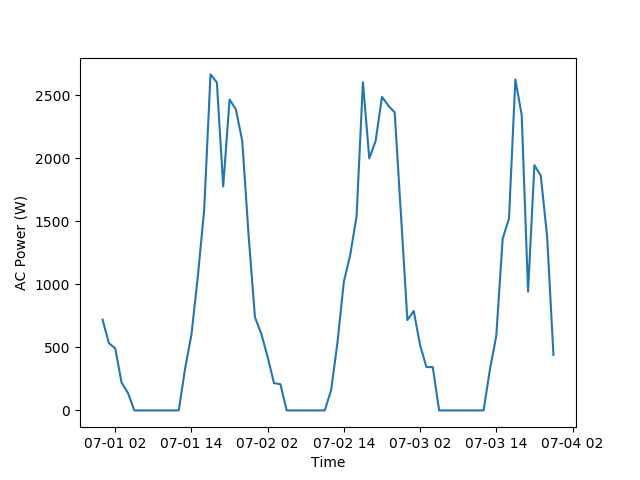

In [5]:
DF_consumption_someDaysInJuly=DF_consumption["2014-07-01 00:00:00":"2014-07-03 23:00:00"]
plt.figure()
plt.plot(DF_consumption_someDaysInJuly)
plt.xlabel("Time")
plt.ylabel("AC Power (W)")
plt.show()

Importing datas from weather file, changing the index of the values.

In [6]:
DF_weather = pd.read_csv(path_TemperatureFile,sep=";",index_col=0)
previousIndex_weather=DF_weather.index
newIndex_weather=pd.to_datetime(previousIndex_weather)
DF_weather.index = newIndex_weather

DF_Temperature= DF_weather[["temperature"]]
DF_Temperature.head()


,temperature
localhour,
2014-01-01 00:00:00,40.36
2014-01-01 01:00:00,38.11
2014-01-01 02:00:00,38.65
2014-01-01 03:00:00,38.47
2014-01-01 04:00:00,38.00


Importing datas from irradiance file.

In [7]:
DF_irradianceSource = pd.read_csv(path_IrradianceFile,sep=";",index_col=1)
DF_irradiance=DF_irradianceSource[["gen"]]
DF_irradiance["gen"]<0
DF_irradiance[DF_irradiance["gen"]<0] = 0

C:\Users\Nora\AppData\Local\Enthought\Canopy32\edm\envs\User\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Nora\AppData\Local\Enthought\Canopy32\edm\envs\User\lib\site-packages\pandas\core\frame.py:2346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
C:\Users\Nora\AppData\Local\Enthought\Canopy32\edm\envs\User\lib\site-packages\pandas\core\frame.py:2326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata

Assembling the three obtained columns of consumption, temperature and generation.

In [8]:
DF_joined = DF_consumption.join([DF_Temperature,DF_irradiance])
DF_joined_cleaned = DF_joined.dropna()
DF_joined_cleaned_chosenDates=DF_joined_cleaned["2014-08-01":"2014-08-03"]

We have to solve the problem of time-zone shifting it 5 hours before.
We have to change the reference hour for the temperature, because dates have been taken 6 hours before the Greenwich mean time. The peak of the temperature must be one hour after the peak of irradiance, due to the thickness of the walls, so we have to shift all the the temperatures 5 hours before.​

In [9]:
DF_joined_cleaned_chosenDates["temperature"]=DF_joined_cleaned_chosenDates["temperature"].shift(-5)
DF_joined_cleaned_chosenDates.dropna()      
DF_joined_cleaned_chosenDates.head()
DF_joined_cleaned_chosenDates.describe()

C:\Users\Nora\AppData\Local\Enthought\Canopy32\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,air conditioner_5545,temperature,gen
count,72.000000,67.000000,72.000000
mean,733.691898,48.664328,1.183241
std,796.353693,7.341467,1.471169
min,0.000000,35.640000,0.000000
25%,0.000000,43.505000,0.000000
50%,484.775000,51.010000,0.278442
75%,1335.737500,53.725000,2.479950
max,2422.866667,62.130000,4.300083


Normalization of all the values in the table and plot of the datas.

<IPython.core.display.Javascript object>


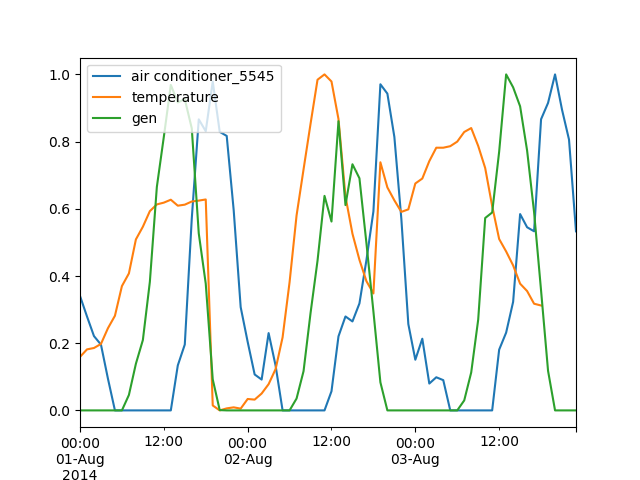

In [10]:
DF_joined_cleaned_chosenDates_min=DF_joined_cleaned_chosenDates.min()
DF_joined_cleaned_chosenDates_max=DF_joined_cleaned_chosenDates.max()
DF_joined_cleanedchosenDates_normalized=(DF_joined_cleaned_chosenDates-DF_joined_cleaned_chosenDates_min)/(DF_joined_cleaned_chosenDates_max-DF_joined_cleaned_chosenDates_min)
DF_joined_cleanedchosenDates_normalized.plot()


We can create lagged features, reconstructing the dataframe in its original form.

In [11]:
DF_joined = DF_consumption.join([DF_Temperature,DF_irradiance])
DF_mod=DF_joined.copy()
DF_mod["temperature"]=DF_mod["temperature"].shift(-5)
DF_mod=DF_mod.dropna()
DF_mod.head()
DF_mod.describe()

,air conditioner_5545,temperature,gen
count,8670.000000,8670.000000,8670.000000
mean,345.519363,67.710211,0.975470
std,655.758361,16.256863,1.421280
min,0.000000,20.730000,0.000000
25%,0.000000,56.650000,0.000000
50%,0.000000,70.220000,0.012242
75%,411.433333,79.480000,1.669108
max,2841.000000,101.050000,5.099667


In order to consider time-lags we have to insert all the columns with shifted hours. We can do it in to ways: shifting directly each hours or using functions. NB: using two different methods we will have the same temperature indexes repeated two times in the dataframe.

We are adding the datas of the 6 hours before because the actual consumption depends also on the datas collected on the previous hours.

In [ ]:
DF_mod["temperature -1h"]=DF_mod["temperature"].shift(1)
DF_mod["temperature -2h"]=DF_mod["temperature"].shift(2)
DF_mod["temperature -3h"]=DF_mod["temperature"].shift(3)
DF_mod["temperature -4h"]=DF_mod["temperature"].shift(4)
DF_mod["temperature -5h"]=DF_mod["temperature"].shift(5)
DF_mod["temperature -6h"]=DF_mod["temperature"].shift(6)
DF_mod.head()

Using functions:


In [13]:
lag_start=1
lag_end=6
lag_interval=1
column_name="temperature"
df=DF_mod

def lag_feature (df,column_name,lag_start, lag_end, lag_interval):
    for i in range(lag_start, lag_end+1, lag_interval):
        new_column_name=column_name+" -"+str(i)+"hr"
        print new_column_name
        df[new_column_name]=df[column_name].shift(i)
        df.dropna(inplace=True)
    return df 

Now we apply the functions to the data frame changing the names of the columns. We consider different hours for the different parameters.
We consider the last 24 hours for AC_consumption to show the behaviour of people and the performance of the building during the day.

In [14]:
DF_mod=DF_mod.rename(columns={"air conditioner_5545":"AC_consumption","gen":"irradiance"})

DF_mod=lag_feature(DF_mod,"temperature",1,6,1)   
DF_mod=lag_feature(DF_mod,"irradiance",3,6,1) 
DF_mod=lag_feature(DF_mod,"AC_consumption",1,24,1)
DF_mod.head()
DF_mod.describe()

temperature -1hr
temperature -2hr
temperature -3hr
temperature -4hr
temperature -5hr
temperature -6hr
irradiance -3hr
irradiance -4hr
irradiance -5hr
irradiance -6hr
AC_consumption -1hr
AC_consumption -2hr
AC_consumption -3hr
AC_consumption -4hr
AC_consumption -5hr
AC_consumption -6hr
AC_consumption -7hr
AC_consumption -8hr
AC_consumption -9hr
AC_consumption -10hr
AC_consumption -11hr
AC_consumption -12hr
AC_consumption -13hr
AC_consumption -14hr
AC_consumption -15hr
AC_consumption -16hr
AC_consumption -17hr
AC_consumption -18hr
AC_consumption -19hr
AC_consumption -20hr
AC_consumption -21hr
AC_consumption -22hr
AC_consumption -23hr
AC_consumption -24hr


,AC_consumption,temperature,irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h,temperature -1hr,...,AC_consumption -15hr,AC_consumption -16hr,AC_consumption -17hr,AC_consumption -18hr,AC_consumption -19hr,AC_consumption -20hr,AC_consumption -21hr,AC_consumption -22hr,AC_consumption -23hr,AC_consumption -24hr
count,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,...,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000
mean,359.794965,67.701648,0.979714,67.703733,67.706331,67.709096,67.711907,67.714434,67.716788,67.703733,...,359.794965,359.794965,359.794965,359.794965,359.794965,359.794965,359.794965,359.794965,359.794965,359.794965
std,665.320280,16.330250,1.422010,16.327691,16.324930,16.322073,16.319110,16.316286,16.313519,16.327691,...,665.320280,665.320280,665.320280,665.320280,665.320280,665.320280,665.320280,665.320280,665.320280,665.320280
min,0.000000,20.730000,0.000000,20.730000,20.730000,20.730000,20.730000,20.730000,20.730000,20.730000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,56.650000,0.000000,56.650000,56.650000,56.650000,56.652500,56.660000,56.660000,56.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,70.240000,0.014058,70.240000,70.240000,70.240000,70.240000,70.240000,70.240000,70.240000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,459.320833,79.560000,1.673250,79.560000,79.560000,79.560000,79.560000,79.560000,79.560000,79.560000,...,459.320833,459.320833,459.320833,459.320833,459.320833,459.320833,459.320833,459.320833,459.320833,459.320833
max,2841.000000,101.050000,5.099667,101.050000,101.050000,101.050000,101.050000,101.050000,101.050000,101.050000,...,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000


To make the time continuous we apply sinus and cosinus functions to the hours to avoid the restart of the time at the beginning of each day (from 23:00 to 00:00).

In [15]:
DF_mod["hour"]=DF_mod.index.hour
DF_mod["sin_hour"]=np.sin(DF_mod.index.hour*2*np.pi/24)
DF_mod["cos_hour"]=np.cos(DF_mod.index.hour*2*np.pi/24)
DF_mod[["hour","sin_hour","cos_hour"]].head(24)

,hour,sin_hour,cos_hour
2014-01-15 14:00:00,14,-5.000000e-01,-8.660254e-01
2014-01-15 15:00:00,15,-7.071068e-01,-7.071068e-01
2014-01-15 16:00:00,16,-8.660254e-01,-5.000000e-01
2014-01-15 17:00:00,17,-9.659258e-01,-2.588190e-01
2014-01-15 18:00:00,18,-1.000000e+00,-1.836970e-16
2014-01-15 19:00:00,19,-9.659258e-01,2.588190e-01
2014-01-15 20:00:00,20,-8.660254e-01,5.000000e-01
2014-01-15 21:00:00,21,-7.071068e-01,7.071068e-01
2014-01-15 22:00:00,22,-5.000000e-01,8.660254e-01
2014-01-15 23:00:00,23,-2.588190e-01,9.659258e-01


Now we add some columns in the table that contains the indexes ordered by days of week, weeks and months.

In [16]:
DF_mod["day_of_week"]=DF_mod.index.dayofweek
DF_mod["month"]=DF_mod.index.month
DF_mod["week_of_year"]=DF_mod.index.week


Exploiting the new added indexes, we use functions to detect which days are part of weekends and which are working days. At the end we add them to the dataframe. In this way we can correlate the datas and the behaviour of consumption with the days of the week.

In [20]:
def WeekendDetector(day):
    if(day==5 or day==6):
        weekendLabel=1
    else:
        weekendLabel=0
    return weekendLabel

DF_mod["weekend"]=DF_mod["day_of_week"].apply(WeekendDetector)

def DayDetector(hour):
    if(hour<19 or hour>9):
        DayLabel=1
    else:
        DayLabel=0
    return DayLabel
    
DF_mod["WorkingTime"]=DF_mod["hour"].apply(DayDetector)

DF_mod[["WorkingTime","weekend"]].head(24)

DF_mod.head()
DF_mod.columns
DF_mod.describe()

,AC_consumption,temperature,irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h,temperature -1hr,...,AC_consumption -23hr,AC_consumption -24hr,hour,sin_hour,cos_hour,day_of_week,month,week_of_year,weekend,WorkingTime
count,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,...,8326.000000,8326.000000,8326.000000,8.326000e+03,8.326000e+03,8326.000000,8326.000000,8326.000000,8326.000000,8326.0
mean,359.794965,67.701648,0.979714,67.703733,67.706331,67.709096,67.711907,67.714434,67.716788,67.703733,...,359.794965,359.794965,11.494715,5.596034e-05,-8.029453e-04,2.997718,6.711506,27.392986,0.285131,1.0
std,665.320280,16.330250,1.422010,16.327691,16.324930,16.322073,16.319110,16.316286,16.313519,16.327691,...,665.320280,665.320280,6.919123,7.072073e-01,7.070908e-01,2.000689,3.303161,14.357780,0.451504,0.0
min,0.000000,20.730000,0.000000,20.730000,20.730000,20.730000,20.730000,20.730000,20.730000,20.730000,...,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,0.000000,1.000000,1.000000,0.000000,1.0
25%,0.000000,56.650000,0.000000,56.650000,56.650000,56.650000,56.652500,56.660000,56.660000,56.650000,...,0.000000,0.000000,5.250000,-7.071068e-01,-7.071068e-01,1.000000,4.000000,15.000000,0.000000,1.0
50%,0.000000,70.240000,0.014058,70.240000,70.240000,70.240000,70.240000,70.240000,70.240000,70.240000,...,0.000000,0.000000,11.000000,1.224647e-16,-1.836970e-16,3.000000,7.000000,27.000000,0.000000,1.0
75%,459.320833,79.560000,1.673250,79.560000,79.560000,79.560000,79.560000,79.560000,79.560000,79.560000,...,459.320833,459.320833,17.000000,7.071068e-01,7.071068e-01,5.000000,10.000000,40.000000,1.000000,1.0
max,2841.000000,101.050000,5.099667,101.050000,101.050000,101.050000,101.050000,101.050000,101.050000,101.050000,...,2841.000000,2841.000000,23.000000,1.000000e+00,1.000000e+00,6.000000,12.000000,52.000000,1.000000,1.0
